In [89]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [90]:
data_train = pd.read_csv('Training set.csv')
data_test = pd.read_csv('Test set.csv')

In [91]:
print(data_train.head(10))

   Height  Weight     Sex
0  165.65   35.41  Female
1  148.53   74.45  Female
2  167.04   81.22    Male
3  161.54   71.47    Male
4  174.31   78.18    Male
5  143.05   79.27  Female
6  149.16   63.71  Female
7  155.80   86.01  Female
8  145.37   88.33  Female
9  162.56   87.36    Male


In [92]:
print(data_test.head(10))

       Height     Weight     Sex
0  146.323241  59.861065  Female
1  175.695412  77.863687    Male
2  183.216164  72.131992    Male
3  184.245269  77.546000    Male
4  132.302261  55.188496  Female
5  149.863914  66.055655  Female
6  191.173088  83.631339    Male
7  135.407174  47.014457  Female
8  184.995763  71.935828    Male
9  179.990887  65.920795    Male


In [93]:
print(data_train.info)

<bound method DataFrame.info of       Height  Weight     Sex
0     165.65   35.41  Female
1     148.53   74.45  Female
2     167.04   81.22    Male
3     161.54   71.47    Male
4     174.31   78.18    Male
...      ...     ...     ...
2995  150.83   49.66  Female
2996  157.09   64.34  Female
2997  162.99   45.58  Female
2998  154.76   48.92  Female
2999  185.08   82.74    Male

[3000 rows x 3 columns]>


In [94]:
print(data_test.info)

<bound method DataFrame.info of          Height     Weight     Sex
0    146.323241  59.861065  Female
1    175.695412  77.863687    Male
2    183.216164  72.131992    Male
3    184.245269  77.546000    Male
4    132.302261  55.188496  Female
..          ...        ...     ...
200  155.090314  77.248911  Female
201  149.175907  93.231692    Male
202  168.030874  63.640623  Female
203  172.608090  55.189983    Male
204  145.082128  45.583285  Female

[205 rows x 3 columns]>


In [95]:
print(data_train.describe())

            Height       Weight
count  3000.000000  3000.000000
mean    161.350427    68.400610
std      54.912719    17.041528
min      25.680000     8.530000
25%     149.502500    57.937500
50%     160.870000    67.370000
75%     171.632500    77.952500
max    3050.000000   485.000000


In [96]:
print(data_test.describe())

           Height      Weight
count  205.000000  205.000000
mean   160.874125   69.927028
std     15.171040   15.462396
min    123.007006   34.726666
25%    148.942667   58.583137
50%    161.749388   69.544469
75%    172.608090   77.964667
max    199.282251  129.410122


In [97]:
# Checking Null values for training set
data_train.isnull().sum()*100/data_train.shape[0]

Height    0.0
Weight    0.0
Sex       0.0
dtype: float64

In [98]:
# Checking Null values for testing set
data_test.isnull().sum()*100/data_test.shape[0]

Height    0.0
Weight    0.0
Sex       0.0
dtype: float64

In [99]:
data_train.shape

(3000, 3)

In [100]:
data_test.shape

(205, 3)

In [101]:
#convert from string values into binary values , this represent label column
data_train['Sex']=data_train['Sex'].replace({'Male':1,'Female':0})
data_test['Sex']=data_test['Sex'].replace({'Male':1,'Female':0})

In [102]:
print(data_train.head(10))

   Height  Weight  Sex
0  165.65   35.41    0
1  148.53   74.45    0
2  167.04   81.22    1
3  161.54   71.47    1
4  174.31   78.18    1
5  143.05   79.27    0
6  149.16   63.71    0
7  155.80   86.01    0
8  145.37   88.33    0
9  162.56   87.36    1


In [103]:
print(data_test.head(10))

       Height     Weight  Sex
0  146.323241  59.861065    0
1  175.695412  77.863687    1
2  183.216164  72.131992    1
3  184.245269  77.546000    1
4  132.302261  55.188496    0
5  149.863914  66.055655    0
6  191.173088  83.631339    1
7  135.407174  47.014457    0
8  184.995763  71.935828    1
9  179.990887  65.920795    1


<function matplotlib.pyplot.show(close=None, block=None)>

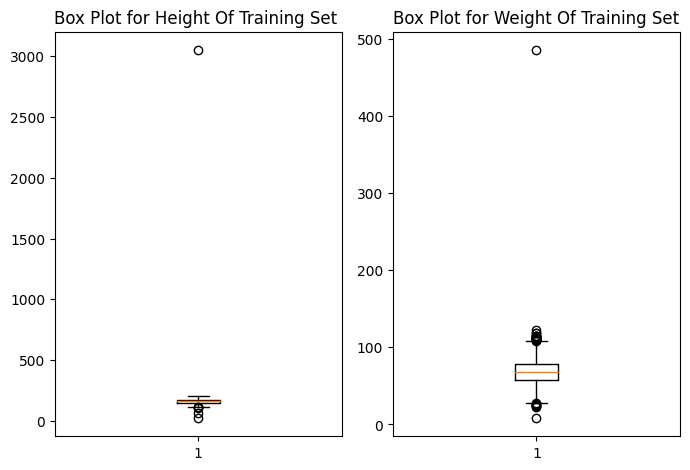

In [104]:
fig = plt.figure(figsize=(7,9))
ax1 = fig.add_subplot(2,2,1)
ax1.boxplot(data_train['Height'])
ax1.set_title('Box Plot for Height Of Training Set ')

ax2 = fig.add_subplot(2,2,2)
ax2.boxplot(data_train['Weight'])
ax2.set_title('Box Plot for Weight Of Training Set')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

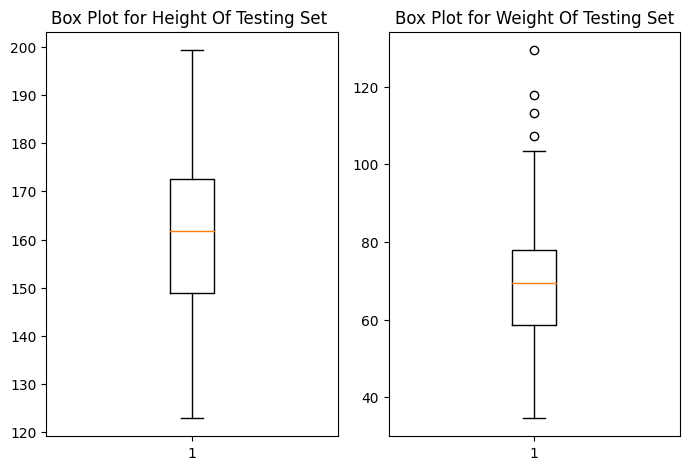

In [105]:
fig = plt.figure(figsize=(7,9))
ax1 = fig.add_subplot(2,2,1)
ax1.boxplot(data_test['Height'])
ax1.set_title('Box Plot for Height Of Testing Set ')

ax2 = fig.add_subplot(2,2,2)
ax2.boxplot(data_test['Weight'])
ax2.set_title('Box Plot for Weight Of Testing Set')
plt.tight_layout()
plt.show

In [106]:
#remove outliers from data training
#Q1 is the 25% and Q3 is 75% of data, Q2 is 50% of data

Q1 = data_train.Height.quantile(0.25)
Q3 = data_train.Height.quantile(0.75)
IQR = Q3 - Q1
data_train = data_train[(data_train.Height >= Q1 - 1.5*IQR) & (data_train.Height <= Q3 + 1.5*IQR)] # drop rows that include outliers

In [107]:
#remove outliers from data testing
#Q1 is the 25% and Q3 is 75% of data, Q2 is 50% of data

Q1 = data_test.Height.quantile(0.25)
Q3 = data_test.Height.quantile(0.75)
IQR = Q3 - Q1
data_test = data_test[(data_test.Height >= Q1 - 1.5*IQR) & (data_test.Height <= Q3 + 1.5*IQR)] # drop rows that include outliers

In [108]:
#remove outliers from data training
#Q1 is the 25% and Q3 is 75% of data, Q2 is 50% of data

Q1 = data_train.Weight.quantile(0.25)
Q3 = data_train.Weight.quantile(0.75)
IQR = Q3 - Q1
data_train = data_train[(data_train.Weight >= Q1 - 1.5*IQR) & (data_train.Weight <= Q3 + 1.5*IQR)] # drop rows that include outliers

In [109]:
#remove outliers from data testing
#Q1 is the 25% and Q3 is 75% of data, Q2 is 50% of data

Q1 = data_test.Weight.quantile(0.25)
Q3 = data_test.Weight.quantile(0.75)
IQR = Q3 - Q1
data_test = data_test[(data_test.Weight >= Q1 - 1.5*IQR) & (data_test.Weight <= Q3 + 1.5*IQR)] # drop rows that include outliers

In [110]:
print(data_train.describe())

            Height       Weight          Sex
count  2966.000000  2966.000000  2966.000000
mean    160.431740    68.106500     0.497303
std      14.862583    14.704601     0.500077
min     117.230000    28.410000     0.000000
25%     149.472500    57.950000     0.000000
50%     160.840000    67.270000     0.000000
75%     171.597500    77.577500     1.000000
max     201.680000   107.860000     1.000000


In [111]:
print(data_test.describe())

           Height      Weight         Sex
count  201.000000  201.000000  201.000000
mean   160.671672   68.991320    0.507463
std     15.235295   14.052155    0.501193
min    123.007006   34.726666    0.000000
25%    148.162538   58.396218    0.000000
50%    161.392870   69.523533    1.000000
75%    172.506495   77.546000    1.000000
max    199.282251  103.390565    1.000000


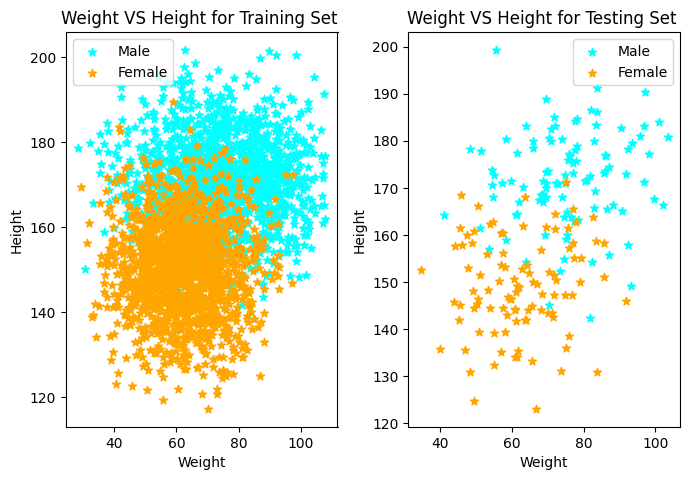

In [112]:
male_train= data_train.query('Sex==1')
female_train=data_train.query('Sex==0')

male_test= data_test.query('Sex==1')
female_test=data_test.query('Sex==0')

fig = plt.figure(figsize=(7,9))
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(male_train['Weight'],male_train['Height'],marker='*' ,color='cyan',label='Male')
ax1.scatter(female_train['Weight'],female_train['Height'],marker='*' ,color='orange',label='Female')
ax1.set_title('Weight VS Height for Training Set ')
ax1.set_xlabel('Weight')
ax1.set_ylabel('Height')
ax1.legend()

ax2 = fig.add_subplot(2,2,2)
ax2.scatter(male_test['Weight'],male_test['Height'],marker='*' ,color='cyan',label='Male')
ax2.scatter(female_test['Weight'],female_test['Height'],marker='*' ,color='orange',label='Female')
ax2.set_title('Weight VS Height for Testing Set ')
ax2.set_xlabel('Weight')
ax2.set_ylabel('Height')
ax2.legend()
plt.tight_layout()

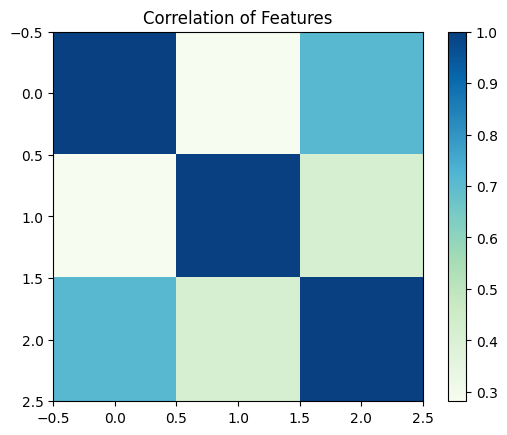

In [113]:
plt.imshow(data_train.corr(),cmap='GnBu',interpolation='nearest')
plt.colorbar()
plt.title('Correlation of Features')
plt.show()

 Number of Male of Training Set:  1475
 Number of Female of Training Set:  1491
 Number of Male of Testing Set :  102
 Number of Female of Testing Set :  99


Text(0.5, 1.0, 'Pie Graph for Testing Set')

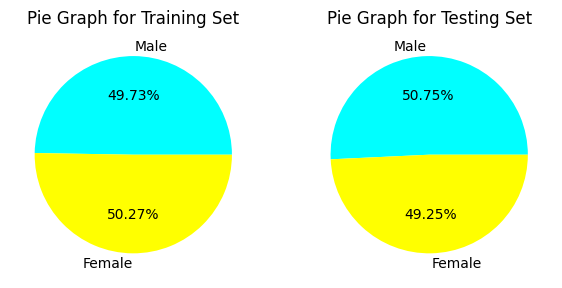

In [114]:
Male_train = data_train.query('Sex==1')
Male_train=Male_train['Sex'].count()
Female_train = data_train.query('Sex==0')
Female_train=Female_train['Sex'].count()
print(' Number of Male of Training Set: ',Male_train)
print(' Number of Female of Training Set: ',Female_train)

Male_test = data_test.query('Sex==1')
Male_test=Male_test['Sex'].count()
Female_test= data_test.query('Sex==0')
Female_test=Female_test['Sex'].count()
print(' Number of Male of Testing Set : ',Male_test)
print(' Number of Female of Testing Set : ',Female_test)

fig = plt.figure(figsize=(7,9))
ax1 = fig.add_subplot(2,2,1)
ax1.pie([Male_train,Female_train],labels=['Male','Female'],autopct='%1.2f%%',shadow=False,colors=['cyan','yellow'])
ax1.set_title('Pie Graph for Training Set')

ax2 = fig.add_subplot(2,2,2)
ax2.pie([Male_test,Female_test],labels=['Male','Female'],autopct='%1.2f%%',shadow=False,colors=['cyan','yellow'])
ax2.set_title('Pie Graph for Testing Set')



In [120]:

x_train=np.array(data_train[['Weight','Height']])
y_train= np.array(data_train['Sex'])

x_test= np.array(data_test[['Weight','Height']])
y_test = np.array(data_test['Sex'])

In [121]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(2966, 2)
(2966,)
(201, 2)
(201,)


In [117]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)
acc = model.score(x_test,y_test)
print('Predicted Values : ',y_predicted)
print('Weights : ' , model.coef_)
print('Bias : ',model.intercept_)
print('Accurecy : ',acc)

Predicted Values :  [0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0
 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0
 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0
 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1
 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0]
Weights :  [[0.06930723 0.19553618]]
Bias :  [-36.12575706]
Accurecy :  0.8805970149253731


In [118]:
# Define a function to plot the data and decision boundaries for each classifier
def plot_decision_boundary(clf, X, y):
    # Create a meshgrid of points to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Make predictions on the meshgrid points
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the data points and decision boundary
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel('Weight')
    plt.ylabel('Height')
    plt.title(type(clf).__name__)
    plt.show()


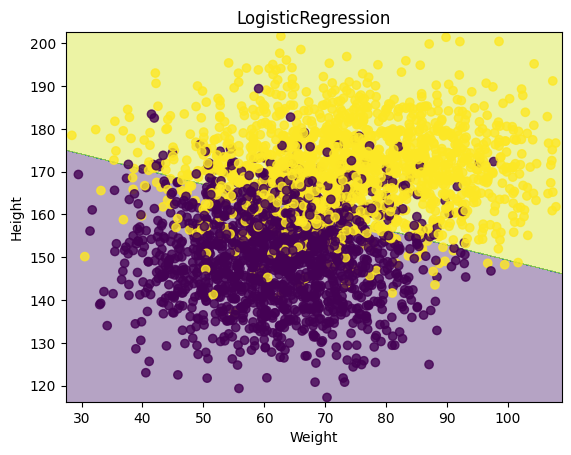

In [119]:
#plot decision boundary
plot_decision_boundary(model,x_train,y_train)